
# Task 1: Prediction using Supervised ML
**AIM :** Predict the percentage of a student based on the number of study hours<br>
**LANGUAGE USED:** Python 3<br>
**IDE:** Jupyter Notebook<br>
**TYPE:** Simple Linear Regression<br>
**AUTHOR:** Akshay Chobe<br>


**STEPS TO BE FOLLOWED:**

- **Step 1:** Import the Dataset
- **Step 2:** Visualize and Analyze the Dataset
- **Step 3:** Prepare the Data
- **Step 4:** Design and Train the Machine Learning Model
- **Step 5:** Visualize the Model
- **Step 6:** Make Predictions
- **Step 7:** Evaluate the Model

### **Step 1:** **Import the Dataset**

In [24]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [25]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)
print("Data imported successfully")

student_data.head(25)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
student_data.shape

(25, 2)

In [27]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Step 2: Visualize and Analyze the Dataset**

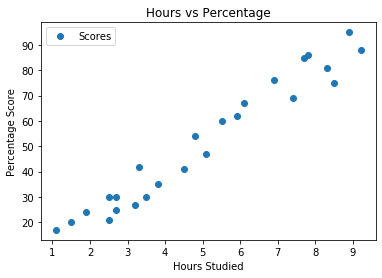

In [29]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Step 3: Prepare the Data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [30]:
X = student_data.iloc[:, :-1].values  
Y = student_data.iloc[:, 1].values

In [31]:
#Number of hours studied
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
#Scores Obtained
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [33]:
# Split the data into train and test datasets using Scikit-Learn's built-in train_test_split()
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [34]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [35]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [36]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [37]:
Y_test

array([20, 27, 69, 30, 62])

### **Step 4: Design and Train the Machine Learning Model**

In [38]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1, 1), Y_train) 

print("The training is completed successfully.")

The training is completed successfully.


### **Step 5: Visualize the Model**

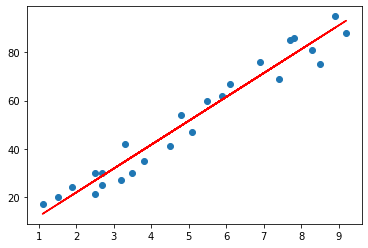

In [17]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color='red');
plt.show()

### **Step 6: Make Predictions**

In [18]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# Testing with custom data of 9.25 hrs/ day
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Step 7: Evaluate the Model**

*__Mean Absolute Error__*


In [21]:
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002982


*__Max Error__*

In [22]:
print('Max Error:', metrics.max_error(Y_test, Y_pred))

Max Error: 6.732260779489835


*__Mean Squared Error__*

In [23]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Squared Error: 21.598769307217456
